# Phénologie dans les Pyrénées : étude de la pollinisation par les bourdons sauvages

## Introduction

Ce projet porte sur la phénologie, c'est-à-dire l'étude des événements biologiques saisonniers dans le monde animal et végétal. Cela concerne le dépliement des feuilles et la pollinisation des plantes au printemps ou en été; la maturation des fruits, le changement de couleur et la chute des feuilles en automne, ainsi que l'apparition et le départ des oiseaux migrateurs et le moment de l'élevage des animaux.

Dans notre cas, on s'intéresse à la pollinisation de plantes sauvages par des bourdons (*bumblebees an anglais*) dans les Pyrénées.

Contrairement au TP précédent, celui-ci sera bien moins guidé. Si vous souhaitez trouver de l'aide, n'hésitez pas à lire le papier scientifique sur lequel ce projet ce base : [Bumblebees moving up: shifts inelevation ranges in the Pyreneesover 115 years.](http://dx.doi.org/10.1098/rspb.2020.2201) par Léon Marshall *et al.* Proc. R. Soc. B (2020)


Les données pour ce projet sont réelles. Les conclusions que vous en tirerez également.

<span style="color:red">
LA MAJ JUPYTERLAB FAIT BUGGER LES MARKDOWNS, PAS DE PB POUR JHUB.

In [21]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import plotly.express as px
%matplotlib inline

Regional_Trend_Temps.csv## Contexte

Les températures à l'échelle mondiale augmentent depuis plusieurs décennies en particulier aux altitudes et latitudes élevées. Cette augmentation a un impact sur la répartition spatiale de la biodiversité, poussant souvent les espèces vers des altitudes et des latitudes plus élevées afin de vivre à  des températures similaires à leur habitat d'autrefois. Cela peut entraîner la disparition de certaines espèces qui habitaient auparavant dans les zones les plus froides car les conditions climatiques favorables n'existent plus ou alors des espèces invasives entrent en compétition et accaparent les ressources.
Lorsque plusieurs espèces sont en interaction, la réponse au changement climatique est encore plus compliquée puisque ces espèces peuvent réagir différemment au réchauffement climatique ou peuvent ne pas avoir la meme capacité de dispersion. Les différences dans la direction ou la vitesse des changements d'aire de répartition pourraient entraîner des décalages phénologiques ou spatiaux dans les relations plantes-pollinisateurs.

Dans ce TP, nous nous intéressons aux changements possible de pollinisation de plantes sauvages par les bourdons dans les Pyrénées qui auraient eu lieu entre 1889 et 2006. Les communautés de bourdons et de plantes ont-elle changé de composition et/ou d'altitude à cause du changement climatique ? Les bourdons pollinisent-ils toujours les mêmes plantes ?

### Bourdons

Les bourdons font partie des principaux pollinisateurs de plantes au même titre que les abeilles. 

<img src=https://upload.wikimedia.org/wikipedia/commons/1/15/Bombus_September_2007-2.jpg width=200/> 
<img src=https://upload.wikimedia.org/wikipedia/commons/8/8f/Bombus_hypnorum_male_-_side_%28aka%29.jpg width=150>

Grâce à leur fourrure isolante, ils ont la particularité de polliniser des plantes dans les environnements les plus froids (en altitude ou en fin de saison) et on les rencontre normalement dans les régions tempérées mais aussi dans les régions plus fraîches que celles très fréquentées par les abeilles.

### Zone étudiée   

Ce TP étudie des données de la commune de Gavarnie-Gèdre dans le département des Hautes-Pyrénées en France, située à côté de la frontière avec l'Espagne. La zone étudiée fait partie du Parc National des Pyrénées (etabli depuis 1967) situé dans la partie ouest des Pyrénées. 

Le parc national est situé entre 1000m et son sommet, 3298m, le Pic Vignemale. La région abrite une flore et une faune vastes et diversifiées avec de nombreuses espèces endémiques (restreinte à cet emplacement géographique). Bien que protégée, elle abrite aussi des habitations et des terres agricoles. Les habitations sont généralement à des altitudes plus basses et les zones agricoles plus haut à flanc de montagne, jusqu'à 2000m. 

<img src=https://www.tourisme-hautes-pyrenees.com/var/ezflow_site/storage/images/media/images/grands-sites/gavarnie/cirque-de-gavarnie2/23250-5-fre-FR/Cirque-de-Gavarnie_format_603x400.jpg width=600>

De manière générale, la végétation de la région correspond à des prairies de fauche et une forêt de pins, avec une ligne d'arbres autour de 2000m d'altitude (altitude maximale des arbres). La région a des climats océaniques et montagnards avec une température annuelle moyenne d'environ 6,5°C et des précipitations annuelles moyennes de 1049mm.


### Le jeu de données

Nous avons accès à deux collections d'échantillons séparés de 115 ans. 

Entre le 5 et le 31 août 1889, le biologiste et naturaliste Prof. Julius MacLeod, a échantillonné les plantes et les communautés de visiteurs des plantes, à sept endroits de la région compris entre 1000 et 2800m d'altitude, avec des visiteurs des plantes enregistrés jusqu'à 2100m d'altitude. Il a publié un récit des plantes et des visiteurs des plantes qu'il a observés en 1891 dans "De pyreneënbloemen". L'objectif de cette enquete était de comparer la communauté florale le long des gradients d'habitat et d'altitude dans les Pyrénées. Néanmoins, MacLeod a collecté et identifié tous les insectes visiteurs observés lors de l'étude de la communauté végétale. MacLeod a étudié 263 espèces de plantes distinctes avec 569 visiteurs d'insectes distincts. Les bourdons collectés par MacLeod ont été identifiés par le professeur Otto Schmiedeknecht.

<img src=https://royalsocietypublishing.org/cms/asset/4f7f9ca3-1258-40d4-89c3-4529eff166ac/rspb20202201f01.jpg width=600>

En août 2005 et août 2006, de nouveaux échantillons ont été collectés en cherchant à rendre les études de 1889 et celle de 2005-2006 aussi comparables que possible en termes de plantes visitées, de lieux et d'altitudes. La cible est de comparer les visiteurs des plantes et pour cela il a fallu trouver une correspondance avec le lieu et les espèces végétales observées par MacLeod. Si cela n'était pas possible, un autre emplacement proche à une altitude similaire avec la même espèce végétale observée par MacLeod a été recherché. De plus, des visiteurs d'autres plantes à fleurs aux emplacements d'origine de MacLeod ont été observés et enfin, d'autres espèces de plantes à fleurs ont été observées à des emplacements correspondant en altitude, mais différents des emplacements MacLeod.


Les localisations des échantillons sont visibles sur la figure ci-dessus.


### A quoi correspond l'échantillonnage ?

Ce paragraphe permet de vous rendre compte de la quantité de travail nécessaire pour obtenir ce type de données.

Pour chaque lieu, une parcelle a été observée pendant 15 min. La taille de la parcelle a été déterminée comme la plus grande surface d'une parcelle de fleurs sur laquelle tous les visiteurs pouvaient être observés (de quelques mètres carrés à une dizaine de mètres carrés selon la croissance et la floraison des espèces végétales). Au cours des 15 minutes, tous les bourdons visiteurs ont été capturés puis identifiés par des experts, excepté pour *B. gerstaeckeriqui* qui a été identifié à vue car il est reconnaissable sur le terrain et rare. La surface de chaque parcelle a été mesurée et sa densité de fleurs a été enregistrée. L'altitude et les coordonnées GPS (WGS 84) de chaque parcelle ont également été enregistrées.

*Ceci étant dit, passons à l'analyse des données !*
 


# Analyse du climat

Dans quelle mesure y a-t-il eu un changement climatique dans les Pyrénées ? 

Vous avez accès au fichier [Regional_Trend_Temps.csv]( "https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_Trend_Temps.csv") à l'adresse https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/. Chargez-le dans un objet appelé `climat_an`.

Pour chaque parcelle (`Grid-ID`) on connait ses coordonnées (`Latitude` et `Longitude`), son altitude (`Elevation`) et la température moyenne (`AnnualMeanTemp`), minimale (`Avg_min`) ou maximale (`Avg_max`) pour chaque année (`Year`).


<span style="color:green">
Pour faciliter la correction, je rédigerai mes réponses en vert à l'aide du conteneur HTML `span style="color:green` utilisé comme dans cette cellule.

Quelle est la dimension de la table ? Combien y a-t-il de parcelles ? Quelle est la température moyenne des mesures de température moyenne, minimale et maximale ? Il y a une chose bizarre. Corrigez la table. Décrivez le reste de la table.

In [22]:
climat_an = pd.read_csv('https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_Trend_Temps.csv')
climat_an.head()

,Year,Grid-ID,Latitude,Longitude,Elevation,AnnualMeanTemp,Avg_min,Avg_max
0,1901,1,42.785195,0.016900,1024.201416,6.766667,11.425000,2.075000
1,1901,2,42.794134,0.015390,1041.625244,6.666667,11.391667,1.966667
2,1901,3,42.786390,0.029005,1161.148071,6.066667,10.675000,1.441667
3,1901,4,42.810815,0.000257,1167.578979,6.066667,10.841667,1.241667
4,1901,5,42.828693,-0.002772,1170.517700,6.075000,10.941667,1.166667


In [23]:
print("lignes :", climat_an.shape[0])
print("colonnes :", climat_an.shape[1])

lignes : 19293
colonnes : 8


<span style="color:green">
Il y a 19293 lignes et 8 colonnes.


In [24]:
len(climat_an.groupby('Grid-ID'))

19293

<span style="color:green">
Il y a 19293 parcelles (ca correspond aux lignes).

In [25]:
print("Température moyenne : ", climat_an['AnnualMeanTemp'].mean())
print("Température minimale moyenne : ", climat_an['Avg_min'].mean())
print("Température maximale moyenne : ", climat_an['Avg_max'].mean())

Température moyenne :  3.928845954492303
Température minimale moyenne :  7.986246738889338
Température maximale moyenne :  -0.12878159608666362


<span style="color:green">  
    
Température moyenne : 3.93  
    
Température min moyenne : 7.99  
    
Température max moyenne : -0.13 


On remarque que les colonnes Avg_min et Avg_max sont inversées.

In [26]:
climat_an = climat_an.rename(columns={'Avg_min' : 'Avg_max', 'Avg_max' : 'Avg_min'})
climat_an.head()

,Year,Grid-ID,Latitude,Longitude,Elevation,AnnualMeanTemp,Avg_max,Avg_min
0,1901,1,42.785195,0.016900,1024.201416,6.766667,11.425000,2.075000
1,1901,2,42.794134,0.015390,1041.625244,6.666667,11.391667,1.966667
2,1901,3,42.786390,0.029005,1161.148071,6.066667,10.675000,1.441667
3,1901,4,42.810815,0.000257,1167.578979,6.066667,10.841667,1.241667
4,1901,5,42.828693,-0.002772,1170.517700,6.075000,10.941667,1.166667


In [27]:
print("Le jeu de données se situe entre ", climat_an['Elevation'].min(), " m et ", climat_an['Elevation'].max(), " m") 

Le jeu de données se situe entre  1024.201416  m et  2190.243164  m


<span style="color:green">
Le jeu de données se situe entre  1024  m et  2191  m.

In [28]:
print("Le jeu de données regroupe des informations sur", climat_an['Year'].max() - climat_an['Year'].min(), "ans")

Le jeu de données regroupe des informations sur 108 ans


<span style="color:green">
Le jeu de données regroupe des informations sur 108 ans.

A partir de cette table uniquement, répondez à la question suivante : Comment évolue la température dans les Pyénées au 20eme siècle (faites une figure) ? Quel est le changement moyen de température par décennie et avec cette estimation? Quelle température attend-on en 2050 ?

<span style="color:silver">
1-Comment évolue la température dans les Pyrénées au 20eme siècle ?

<span style="color:silver">
J'ai choisi d'afficher les températures moyennes afin de "vulgariser" et de mieux voir ce qu'il se passe. en effet c'est plus agréable et descriptif que pleins de petits plot.

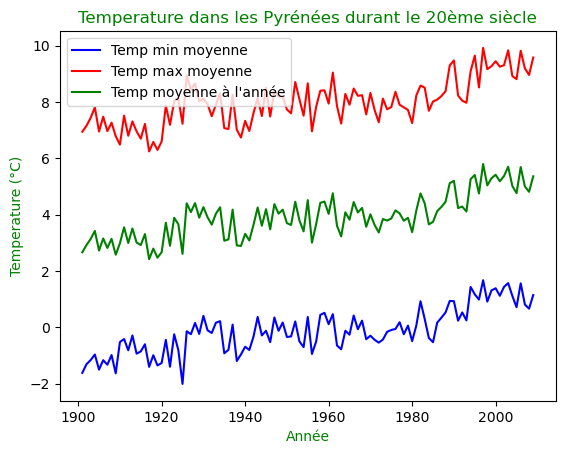

In [29]:
Avg_min_mean = climat_an.groupby('Year')['Avg_min'].mean()
Avg_max_mean = climat_an.groupby('Year')['Avg_max'].mean()
AnnualMeanTemp_mean = climat_an.groupby('Year')['AnnualMeanTemp'].mean()

plt.plot(Avg_min_mean.index, Avg_min_mean.values, color='blue', linestyle='-', label='Temp min moyenne')
plt.plot(Avg_max_mean.index, Avg_max_mean.values, color='red', linestyle='-', label='Temp max moyenne')
plt.plot(AnnualMeanTemp_mean.index, AnnualMeanTemp_mean.values, color='green', linestyle='-', label='Temp moyenne à l\'année')

plt.xlabel('Année', color="green")
plt.ylabel('Temperature (°C)', color="green")
plt.title('Temperature dans les Pyrénées durant le 20ème siècle', color="green")
plt.legend()


plt.show()

<span style="color:green">
On remarque à vu d'oeil que les températures augmentent.

<span style="color:silver">
2-Le changement moyen.

<span style="color:silver">
a-Aperçu des données.

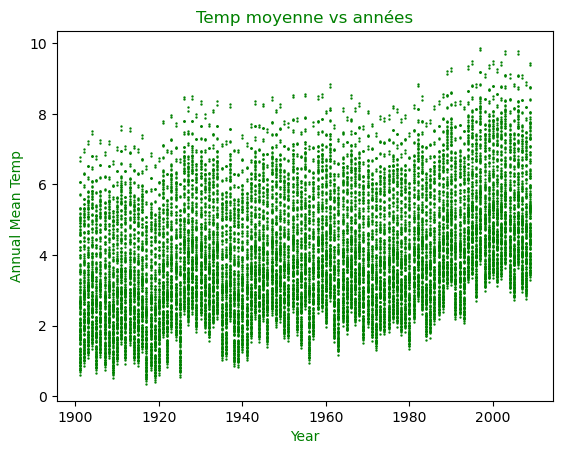

In [30]:
plt.scatter(climat_an['Year'], climat_an['AnnualMeanTemp'], s = 0.5, color='green')
plt.xlabel('Year', color = "green")
plt.ylabel('Annual Mean Temp', color = "green")
plt.title('Temp moyenne vs années', color="green")
plt.show()

<span style="color:silver">
Essayons de visualiser ce changement en considérant les décennies comme des checkpoints afin d'avoir potentiellement quelque chose de plus visible.

In [31]:
#On va essayer de passer par le format datetime pour mettr eune fréquence temporelle.
#On pourrait faire Yearmod10 == 0 pour aller de 1900 à 2000 10 par 10.
climat_dec = climat_an.copy()

#string to datetime
climat_dec['Year'] = pd.to_datetime(climat_dec['Year'], format = '%Y')

climat_dec = climat_dec.set_index('Year')

#on met une frq de 10 ans et on prend la moyenne pour chaque temp.
climat_dec = climat_dec.resample('10Y').mean()
climat_dec.reset_index(inplace=True)

#On remet en string
climat_dec['Year'] = climat_dec['Year'].dt.strftime('%Y')

climat_dec.head(4)

,Year,Grid-ID,Latitude,Longitude,Elevation,AnnualMeanTemp,Avg_max,Avg_min
0,1901,89.0,42.759605,0.01159,1817.391468,2.663653,6.944586,-1.618879
1,1911,1062.5,42.759605,0.01159,1817.391468,3.042444,7.186243,-1.100725
2,1921,2832.5,42.759605,0.01159,1817.391468,2.980584,6.858508,-0.897378
3,1931,4602.5,42.759605,0.01159,1817.391468,3.802123,8.069298,-0.464539


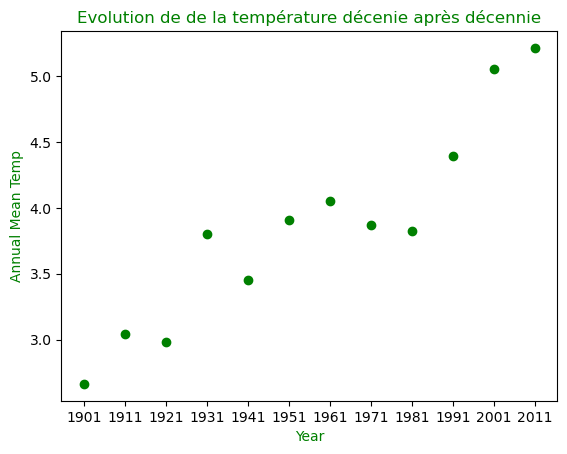

In [32]:
plt.scatter(climat_dec['Year'], climat_dec['AnnualMeanTemp'], color='green')
plt.xlabel('Year', color="green")
plt.ylabel('Annual Mean Temp', color ="green")
plt.title('Evolution de de la température décenie après décennie', color="green")
plt.show()

<span style="color:silver">
On peut remarquer une certaines tendance, ce constat nous incite à faire une régression linéaire.

<span style="color:silver">
On note qu'on choisit de prendre toutes les données plûtot que prendre la valeure atteinte à chaque décenie. En effet, en entraînant les données représentées par le nuage de point juste au dessus, on aurait des meilleurs résultats si on évalue, cependant on aurait probablement fait de l'overfitting. Ainsi, sous votre conseil j'ai pris les données qu'on a sur celui encore au dessus (avec toutes les données par année). 

<span style="color:silver">
b-Régression linéaire.

In [33]:
climat_reg = climat_an[['Year', 'AnnualMeanTemp']]
climat_reg.shape

(19293, 2)

In [34]:
X = climat_reg['Year'].values.reshape(-1, 1)
Y = climat_reg['AnnualMeanTemp'].values
print(X.shape)
print(Y.shape)

(19293, 1)
(19293,)


In [35]:
#Séparation des données
#X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size = 0.2)

In [36]:
#Entraînons le modèle
reg=sk.linear_model.LinearRegression()
reg.fit(X,Y)

LinearRegression()

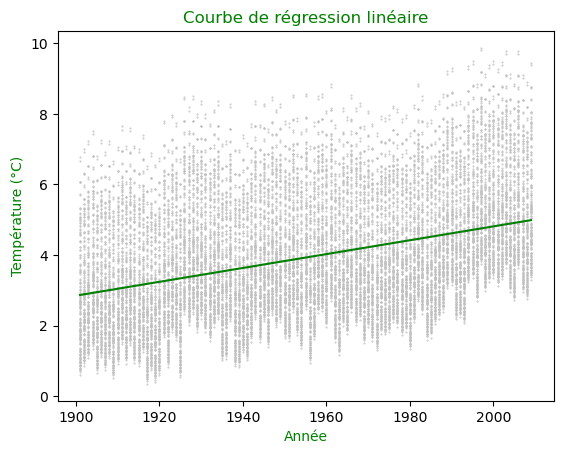

In [37]:
#Affichons la courbe de Régression linéaire.
plt.plot(X, reg.predict(X), color="green")
plt.scatter(X, Y, color="silver", s=0.2)
plt.title("Courbe de régression linéaire", color="green")
plt.xlabel("Année", color="green")
plt.ylabel("Température (°C)", color="green")

plt.show()

In [38]:
#On oublie pas de multiplier par 10 car on veut une prédiction sur les décennies.
print("Changement de température moyen entre chaque décenies : ", reg.coef_*10)

Changement de température moyen entre chaque décenies :  [0.19623922]


<span style="color:silver">
c-Prédiction sur 2050

In [39]:
print("On prévoit pour 2050 : ", reg.predict([[2050]]))

On prévoit pour 2050 :  [5.7931185]


<span style="color:green">
Le changement moyen par décenie est de 0.19623922. 

###### <span style="color:green">
Par le biais de la régression linéaire, on estime une température d'environ 5.8 °C en 2050.

### Utilisation des sols

Nous allons travailler sur le fichier [Regional_LandUse.csv]( "https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_LandUse.csv") disponible sur la même page internet que précedemment. Chargez le dans un objet appelé `landUse`.

Pour chaque parcelle (`Grid_ID`), on a sa zone d'élevation (`EleZone`) qui correspond à de la moyenne montagne, une zone subalpine ou alpine (*z1, z2, z3 respectivement*) ainsi que son altitude moyenne (`Avg_Ele`). Ensuite, on connait aussi l'utilisation de ces sols pour chaque décennie (`LUn` où *n* est la décennie). Le code est le suivant 333 = Forêt, 444 = Prairie et 555 = Autres (neige ou sol caillouteux).


Pour chaque zone d'élevation, l'utilisation des sols a-t-elle changée au cours du XXe siècle ? Faites au moins une figure.

In [40]:
# votre code ici 
#Code de lecture: 333 = Forest, 444 = Grassland, 555 = Other (e.g. Snow and bare ground)
landUse = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_LandUse.csv")
landUse.head()

,Grid_ID,Avg_Ele,LU1910,LU1920,LU1930,LU1940,LU1950,LU1960,LU1970,LU1980,LU1990,LU2000,LU2010,EleZone
0,1,2188.501217,555,555,555,555,555,555,555,555,555,555,555,z3
1,2,1632.670093,444,333,333,333,333,333,333,444,444,444,444,z2
2,3,1343.865375,444,444,333,333,333,333,333,333,333,333,333,z1
3,4,2079.838211,444,333,333,333,333,333,444,444,444,444,444,z3
4,5,1687.210676,444,333,333,333,333,333,333,333,333,333,333,z2


In [41]:
#Cette procédure crée un graphe pour une EleZone donnée.
#j'ai un peu galérer mais ça donne un graphe facile à lire et une belle visualisation.
#Je pense que j'aurais pu faire une heatmap avec seaborn mais le visuel est mieux et plus simple
#avec les triplets de barres.

In [42]:
def sol_count(df, elezone):
    #On crée un tableau avec les décennies.
    dec = np.arange(1910, 2020, 10)
    #on fait itérer sur le tableau pour avoir le format qu'on a dans la df (servira pour les abscisses).
    labels = ['LU{}'.format(lu) for lu in dec] 
    #largeur bar (utile pour espacements).
    width = 0.25
    
    #On crée une figure et un axe.
    fig, ax = plt.subplots()
    
    #On Crée les triplets associés à une couleur sur lesquels on va itérer.
    for i, triplet in enumerate([(555, 'r'), (444, 'b'), (333, 'g')]):
        #liste des valeurs 555 444 333 de toutes les décennies.
        bar_vals = []
        #on itère sur les décennies.
        for lu in dec:
            #On garde que EleZone et les LU
            subset = df.loc[:, df.columns.str.contains(f"LU{lu}|EleZone")]
            #On filtre avec l'elezone en param.
            subset = subset[subset['EleZone'] == elezone]
            #On compte le nombre de 555 444 ou 333 dans cette décennie.
            count = (subset == triplet[0]).sum().sum()
            #On le met dans la liste.
            bar_vals.append(count)
        #Une fois qu'on a compté pour toutes les décennies,
        
        #Position horizontale des bar, en fait on fait un tableau où on espace chaque valeure (on fait attention à pas superposer les barres d'un même triplet)
        x = np.arange(len(dec)) + (i - 1) * width
        #On prend les valeures, qu'on associe à la position et on crée les bar pour le type de sol auquel on est.
        ax.bar(x, bar_vals, width=width, color=triplet[1], label=str(triplet[0]))
        
    #on setup la figure.
    ax.set_ylabel('Nombre de terrains', color='green')
    ax.set_xlabel('Décennies', color='green')
    ax.set_xticks(np.arange(len(dec)))
    ax.set_xticklabels(labels)
    ax.set_title(f"Répartition de l'utilisation du sol pour l'EleZone {elezone}", color='green')
    ax.legend()
    
    plt.xticks(fontsize=8)
    plt.xticks(rotation=45)

    plt.show()
    

In [43]:
#petite verif qu'on compte bien.
landUse.groupby('EleZone')['LU1910'].value_counts()

EleZone  LU1910
z1       444       12
         333        4
         555        2
z2       444       40
         333        8
         555        6
z3       444       64
         555       60
         333        2
Name: LU1910, dtype: int64

<span style="color:silver">
A-La moyenne montagne.

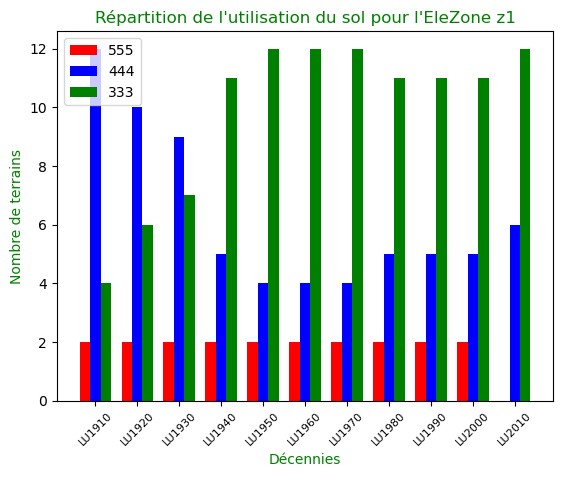

In [44]:
sol_count(landUse, 'z1')

<span style="color:silver">
Dans les premières décennies on remarque que dans les moyennes montagnes les prairies dominent largement, cependant
on s'aperçoit que les forêts les rattrapent puis les dépassent très largement.

<span style="color:silver">
B-Zone subalpine.

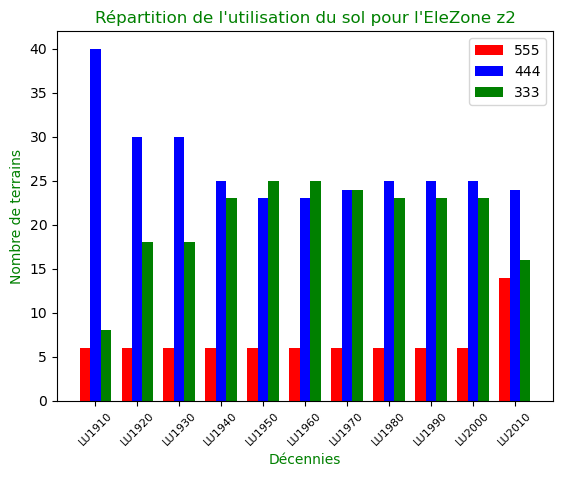

In [45]:
sol_count(landUse, 'z2')

<span style="color:silver">
Même constat que les moyennes montagnes conçernant la dominance des prairies dans les premières décennies. De même, les forêts viennent les rattraper mais pour qu'au final que ca s'équilibre.
On peut noter une fulgurance des zones de neiges ou caillouteux pour la dernière décennie.

<span style="color:silver">
C-Zone alpine

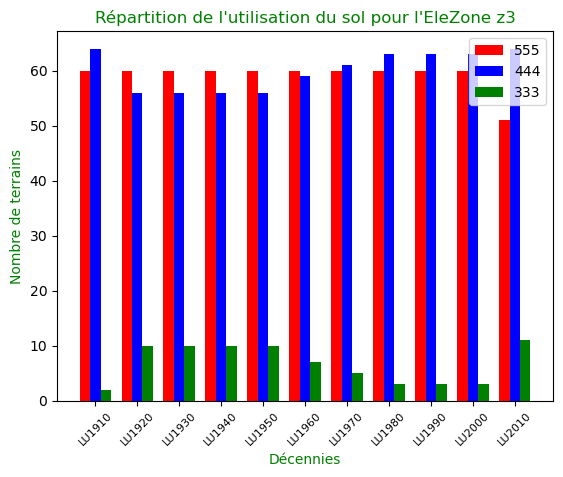

In [46]:
sol_count(landUse, 'z3')

<span style="color:silver">
Ici c'est très régulier, pas vraiment de variation, on note qu'il y a quasiment que des prairies et des zones de neiges ou caillouteux. 

<span style="color:green">
CONCLUSION:

<span style="color:green">
Dans la moyenne montagne on retrouve d'avantage de prairie au début du 20ème siècle, cependant on remarque que le nombre de forêts a beaucoup augmenté 
pour finalement dépasser très largement le nombre de prairies. (On peut rajouter qu'il n'y a pas beaucoup de présence de neige ou de zones caillouteux).

<span style="color:green">
Dans la zone subalpine, l'évolution est similaire à celle de la moyenne montagne avec une dominance des prairies qui se font ensuite rattraper par les forêts. Cependant, contrairement à la première figure, on remarque
qu'une sorte d'équilibre s'est créée, on peut souligner une fulgurance des zones "Autres" ainsi qu'une baisse de forêt pour la dernière décennie. 

<span style="color:green">
Dans la zone alpine, il n' y a presque que des praries et des zones de neiges ou caillouteux. Il n'y a pas beacoup de variation.  

<span style="color:green">
En résumé, ces figures nous montrent un dynamisme plus que surprennant conçernant la moyenne montagne et la zone subalpine. Néanmoins, la zone alpine se démarque en étant complètement stable.  

<span style="color:green">
Que pouvons nous déduire (plûtot conjecturer) ?

<span style="color:green">
->On remarque qu'au début les prairies étaient largement utilisées (sûrement pour des raisons agricoles) dans la moyenne montagne et la zone subalpine, c'est à dire des endroits fréquent.ables.és par l'homme. On voit que dans ces zones, la forêt a commencé à prendre énormément de place; Cette information nous permet de supposer un abandon des potentiels lieux d'agriculture. Pour les zones alpines, ce sont des endroits diffciles d'accès pour les hommes, ce qui pourrait expliquer la stabilité des éléments du paysage, et confirmer l'impact de l'homme sur les deux autres zones.   

<span style="color:green">
après analyse et conclusion sur ces figures, on peut se poser plusieurs questions : pourquoi un potentiel abandon des lieux d'agricultures?(déforestation?, température?, pollution?, activités humaines?, raisons économiques?), où ces agriculteures pourraient/se seraient-ils allés? (Dans le document rspb.2020.2021 on nous informe que de nouveaux lieux sont propices à la l'agriculture en haute montagne dû fait du changement climatique
, confère page 7), quelles-sont les conséquences sur la biodiversité?

### Richesse de la biodiversité

Avant de continuer notre analyse sur la biodiversité, on va évaluer la qualité d'échantillonnage des parcelles. On s'intéresse donc à la *quantité* de biodiversité échantillonnée au XIXe et au XXe. A partir de ces estimations on va pouvoir répondre à la question suivante: est-ce que la richesse de biodiversité a évolué au XXe siècle?

MacLeod et l'équipe de 2005-2006 n'ont pas fourni les mêmes efforts d'échantillonnage. Avec les moyens techniques récents, il est plus facile d'observer la biodiversité. Afin de comparer les 2 expériences, il faut comparer la quantité d'espèces observées *étant donné l'effort d'échantillonnage*. En effet, en écologie une difficulté est d'estimer ce que signifie biodiversité. Dit autrement, si vous n'échantillonnez qu'un seul individu, vous n'aurez qu'une seule espèce présente dans votre parcelle alors que si vous échantillonnez 100,000 individus (comprendre, un individu = un insecte et, une espèce comporte plusieurs individus) alors vous aurez probablement échantillonné toutes les espèces présentes sur votre parcelle. Est-ce que l'observation de 15min d'une parcelle est suffisante pour ce faire une idée de la biodiversité ?

Pour répondre à cette question on va produire une *courbe de raréfaction* qui correspond au nombre d'individus échantillonnés sur l'axe des x par rapport au nombre d'espèces sur l'axe des y.  Pour chaque parcelle, nous allons sous-échantillonner notre jeu de données et regarder combien d'espèce on trouve. 

Vous utiliserez des objets déjà utilisés mais aussi les données de [Bumblebee_data_climate_Marshall_et_al_2020.csv](https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Bumblebee_data_climate_Marshall_et_al_2020.csv). Chargez cette table dans `bumblebee`.
Cette table contient les positions géographiques des échantillonnages (`Longitude` et `Latitude`),la température (`clim`), l'espèce observée `Visitor` et la plante visitée `Plant`. il y a aussi la `Date` d'échantillonnage, le `Site` avec son altitude minimale, maximale et sa zone d'élevation (`MinEle` et `MaxEle`, `EleZone`). Il y a aussi l'origine de l'échantillonnage (`Data` vaut MacLeod ou 'Biesmeijer' pour l'étude de 2005-2006)

Commencez par estimer le nombre d'espèces observées par site par période d'étude et comparez-le au nombre d'individus. *A priori*, y  a-t-il saturation lors de l'échantillonnage ? A quelle(s) altitude(s) observe-t-on le plus d'individus ? d'espèces ? Enfin, calculez la courbe de raréfaction et commentez.


In [47]:
#votre code ici
import random 
bumblebee = pd.read_csv('https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Bumblebee_data_climate_Marshall_et_al_2020.csv')
bumblebee.head(10000)

,Longitude,Latitude,Visitor,Plant,Date,Site,Data,MinEle,MaxEle,EleZone,clim
0,-0.041130,42.74037,Bombus terrestris complex,Carduus carlinoides,18/8/1889,Port de Gavarnie,MacLeod,1900,1900,1800-2000,10.5
1,-0.038612,42.74206,Bombus sichelii,Carduus defloratus,18/8/1889,Port de Gavarnie,MacLeod,1800,1800,1800-2000,10.9
2,-0.036181,42.70804,Bombus sichelii,Carduus carlinoides,15/8/1889,weg naar de Br�che de Roland (Gavarnie),MacLeod,2000,2000,2000-2200,9.9
3,-0.035850,42.74282,Bombus hortorum,Scutellaria alpina,18/8/1889,Port de Gavarnie,MacLeod,1700,1700,1600-1800,11.4
4,-0.035850,42.74282,Bombus lapidarius,Carduus carlinoides,18/8/1889,Port de Gavarnie,MacLeod,1700,1700,1600-1800,11.4
...,...,...,...,...,...,...,...,...,...,...,...
849,0.117694,42.72300,Bombus ruderarius,Cirsium eriophorum,27/8/2006,P360,Biesmeijer,2150,2150,2000-2200,11.2
850,0.117694,42.72300,Bombus gerstaeckeri,Aconitum sp.,27/8/2006,P361,Biesmeijer,2150,2150,2000-2200,11.2
851,0.117694,42.72300,Bombus wurflenii,Aconitum sp.,27/8/2006,P361,Biesmeijer,2150,2150,2000-2200,11.2
852,0.117694,42.72300,Bombus mesomelas,Aconitum sp.,27/8/2006,P361,Biesmeijer,2150,2150,2000-2200,11.2


In [48]:
bumblebee.shape

(854, 11)

<span style="color:silver">
1-Estimation du nombre d'espèces et d'individus par site, par péridode d'étude.  

Afin d'estimer, je vais tenter d'utiliser la méthode de capture-marquage-recapture.

In [49]:
# On crée la df qui stockera les estimations.
df_estim = pd.DataFrame(columns=["Site", "Data", "Nb_individus", "Nb_especes"])

#Itère pour chaque couple site, date
for (site, data), couple in bumblebee.groupby(["Site" , "Data"]) :
    
    n_ind = len(couple)
    #On marque aléaatoirement.
    couple["Marque"] = np.random.choice([True, False], n_ind)
    #On sépare les marqués et non marqués.
    marque = couple[couple["Marque"] == True]
    non_marque = couple[couple["Marque"] == False]
    #on estime nombre individus et nombre espèces.
    pop = (len(marque)* len(non_marque)) / len(couple[couple["Marque"].notnull()])
    spec = len(couple["Visitor"].unique()) * pop / n_ind
    
    df_estim = pd.concat([df_estim, pd.DataFrame ({
        "Site" : [site],
        "Data": [data],
        "Nb_individus" : [pop],
        "Nb_especes" : [spec]
    })], ignore_index = True)

In [50]:
df_estim.head(100)

,Site,Data,Nb_individus,Nb_especes
0,Cirque de Gavarnie,MacLeod,0.000000,0.000000
1,Gavarnie,MacLeod,21.678161,2.242568
2,Gedre,MacLeod,42.713450,2.747649
3,Gedre (op akkerland),MacLeod,0.000000,0.000000
4,H�as,MacLeod,0.000000,0.000000
...,...,...,...,...
95,P156,Biesmeijer,0.750000,0.750000
96,P157,Biesmeijer,0.666667,0.222222
97,P161,Biesmeijer,2.000000,1.000000
98,P162,Biesmeijer,1.333333,0.666667


In [129]:
mc = df_estim[df_estim['Data'] == 'MacLeod']
b = df_estim[df_estim['Data'] == 'Biesmeijer']
print(mc['Nb_individus'].max() ,  mc['Nb_especes'].max())
print(b['Nb_individus'].max(), b['Nb_especes'].max()) 

42.57309941520468 2.738620430217845
3.4285714285714284 1.44


In [130]:
print(df_estim.groupby('Data')['Nb_individus'].sum())
print(df_estim.groupby('Data')['Nb_especes'].sum())

Data
Biesmeijer    87.698810
MacLeod       66.808732
Name: Nb_individus, dtype: float64
Data
Biesmeijer    52.455295
MacLeod        7.376262
Name: Nb_especes, dtype: float64


In [131]:
(df_estim.loc[~(df_estim['Nb_especes'] == 0) & (df_estim['Data'] == 'MacLeod')])['Nb_especes'].mean()

1.47525249138113

In [61]:
(df_estim.loc[~(df_estim['Nb_individus'] == 0)])['Nb_individus'].mean()

3.7787610619469025

<span style="color:silver">
1) Estimation triviale avec les observations dans le jeu de données.

In [56]:
df_estim = pd.DataFrame(columns=["Site" , "Data", "Nb_individus", "Nb_especes"])

for (site, data), couple in bumblebee.groupby(["Site", "Data"]):
    n_ind = len(couple)
    n_spec = len(couple["Visitor"].unique())
    
    df_estim = pd.concat([df_estim, pd.DataFrame({
        "Site":[site],
        "Data":[data],
        "Nb_individus": [n_ind],
        "Nb_especes":[n_spec],
    })], ignore_index=True)
    
df_estim.head(100)

,Site,Data,Nb_individus,Nb_especes
0,Cirque de Gavarnie,MacLeod,2,2
1,Gavarnie,MacLeod,87,9
2,Gedre,MacLeod,171,11
3,Gedre (op akkerland),MacLeod,1,1
4,H�as,MacLeod,1,1
...,...,...,...,...
95,P156,Biesmeijer,4,4
96,P157,Biesmeijer,3,1
97,P161,Biesmeijer,8,4
98,P162,Biesmeijer,6,3


In [63]:
df_estim.shape

(226, 4)

<span style="color:silver">
On compare le nombre d'espèce par site et le nombre d'invidu total observé.

In [96]:
df_estim.groupby('Data').agg({'Nb_especes': 'mean', 'Nb_individus': 'sum'})

,Nb_especes,Nb_individus
Data,,
Biesmeijer,1.788732,568
MacLeod,3.461538,286


<span style="color:green">
On a plus d'invidus sur l'échantillon de Biesmeijer, logique vu la différence de moyens. Le nombre d'espèces par Site est plus elevés chez MacLeod, ce qui est normal car on a que des parcelles comme Site pour biesmeijer.

In [65]:
df_estim.sort_values('Nb_especes', ascending=False)

,Site,Data,Nb_individus,Nb_especes
2,Gedre,MacLeod,171,11
1,Gavarnie,MacLeod,87,9
205,P412,Biesmeijer,10,6
33,P040,Biesmeijer,9,6
58,P095,Biesmeijer,10,5
...,...,...,...,...
127,P282,Biesmeijer,2,1
59,P096,Biesmeijer,1,1
125,P280,Biesmeijer,1,1
124,P277,Biesmeijer,2,1


<span style="color:green">
En effet, on peut supposer une saturation de l'échantillonage car si on regarde les deux premières lignes on a presque deux fois plus d'espèces pour même pas deux espèces en plus, on a un peu le même constat pour la troisème ligne avec la deuxième on sent que la croissance du nombre d'espèce diminue.

<span style="color:silver">
2)Estimation nombre d'individus/espèces par altitude (EleZone)

In [68]:
n_especes = bumblebee.groupby("EleZone")["Visitor"].nunique()

n_individus = bumblebee.groupby("EleZone")["Visitor"].count()

df_ele = pd.DataFrame({"Nb_especes": n_especes, "Nb_individus": n_individus})

df_ele.head(6)

,Nb_especes,Nb_individus
EleZone,,
1000-1200,11,247
1200-1400,11,51
1400-1600,11,259
1600-1800,12,191
1800-2000,9,64
2000-2200,8,42


<span style="color:silver">
a)Affichons la répartiton globale.

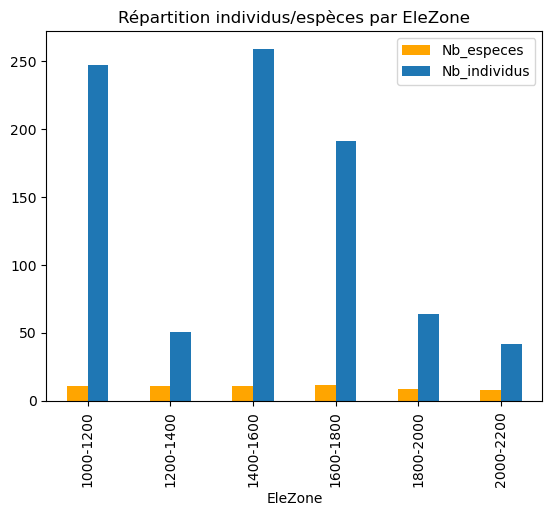

In [67]:
df_ele.plot(kind="bar", color=["orange", "tab:blue"])
plt.title("Répartition individus/espèces par EleZone")
plt.show()

<span style="color:silver">
b)Répartition spec/ind par EleZone pour chaque période (plus intéressant) 

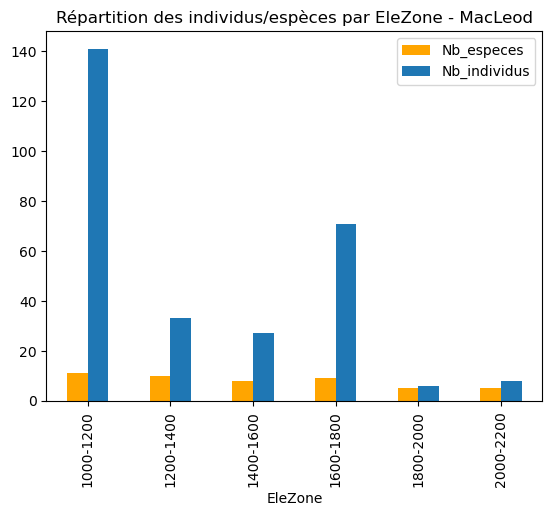

In [70]:
df_ele_mac = bumblebee[bumblebee['Data'] == 'MacLeod']
nspec_ele_mac = df_ele_mac.groupby('EleZone')['Visitor'].nunique()
nind_ele_mac = df_ele_mac.groupby('EleZone')['Visitor'].count()
df_ele_ma2 = pd.DataFrame({"Nb_especes": nspec_ele_mac, "Nb_individus": nind_ele_mac})

df_ele_ma2.plot(kind="bar", color=["orange", "tab:blue"])
plt.title("Répartition des individus/espèces par EleZone - MacLeod")
plt.show()

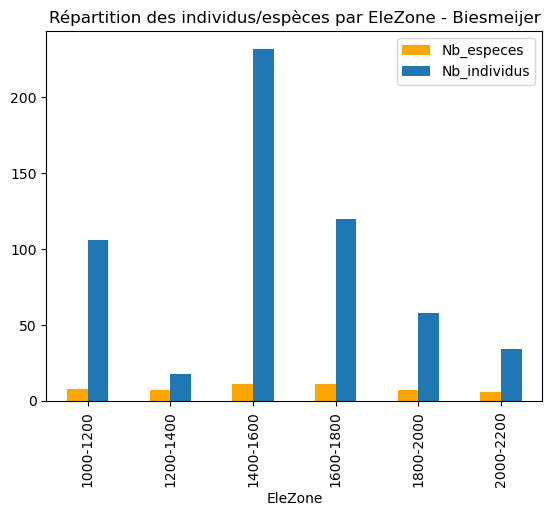

In [72]:
b = bumblebee[bumblebee['Data'] == 'Biesmeijer']
nspec_ele_b = b.groupby('EleZone')['Visitor'].nunique()
nind_ele_b = b.groupby('EleZone')['Visitor'].count()
df_ele_b = pd.DataFrame({"Nb_especes": nspec_ele_b, "Nb_individus": nind_ele_b})

df_ele_b.plot(kind="bar", color=["orange", "tab:blue"])
plt.title("Répartition des individus/espèces par EleZone - Biesmeijer")
plt.show()

<span style="color:green">
On remarque que les bourdons sont concentrés vers de plus hautes altitudes pour l'étude de 2005-2006. Peut-être un changement d'endroit pour la pollénisation ou bien des altitudes difficiles à atteindre à l'époque de MacLeod. On retrouve globalement plus d'individus entre 1600 et 1800 m (mais pas de loin) 

<span style="color:silver">
affichage des estimations triviales.

In [140]:
def plot_estimations(df, data_value):
    # Filtrer les données correspondant à la valeur de Data spécifiée
    data_df = df[df["Data"] == data_value]

    # Grouper les données par Site
    site_groups = data_df.groupby("Site")

    # Récupérer les estimations pour chaque Site
    nb_individus = site_groups["Nb_individus"].sum()
    nb_especes = site_groups["Nb_especes"].sum()

    # Créer les barres par paires pour chaque Site
    x_values = range(len(site_groups))
    bar_width = 0.35
    fig, ax = plt.subplots(figsize=(30, 6))
    ax.bar(x_values, nb_individus, bar_width, label="Nb individus")
    ax.bar([i + bar_width for i in x_values], nb_especes, bar_width, label="Nb especes")
    ax.set_xticks([i + bar_width/2 for i in x_values])
    ax.set_xticklabels(list(site_groups.groups.keys()))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 8)
    ax.set_xlabel("Site")
    ax.set_ylabel("Estimation")
    ax.set_title(f"Estimations pour {data_value}")
    ax.legend()
    plt.show()    

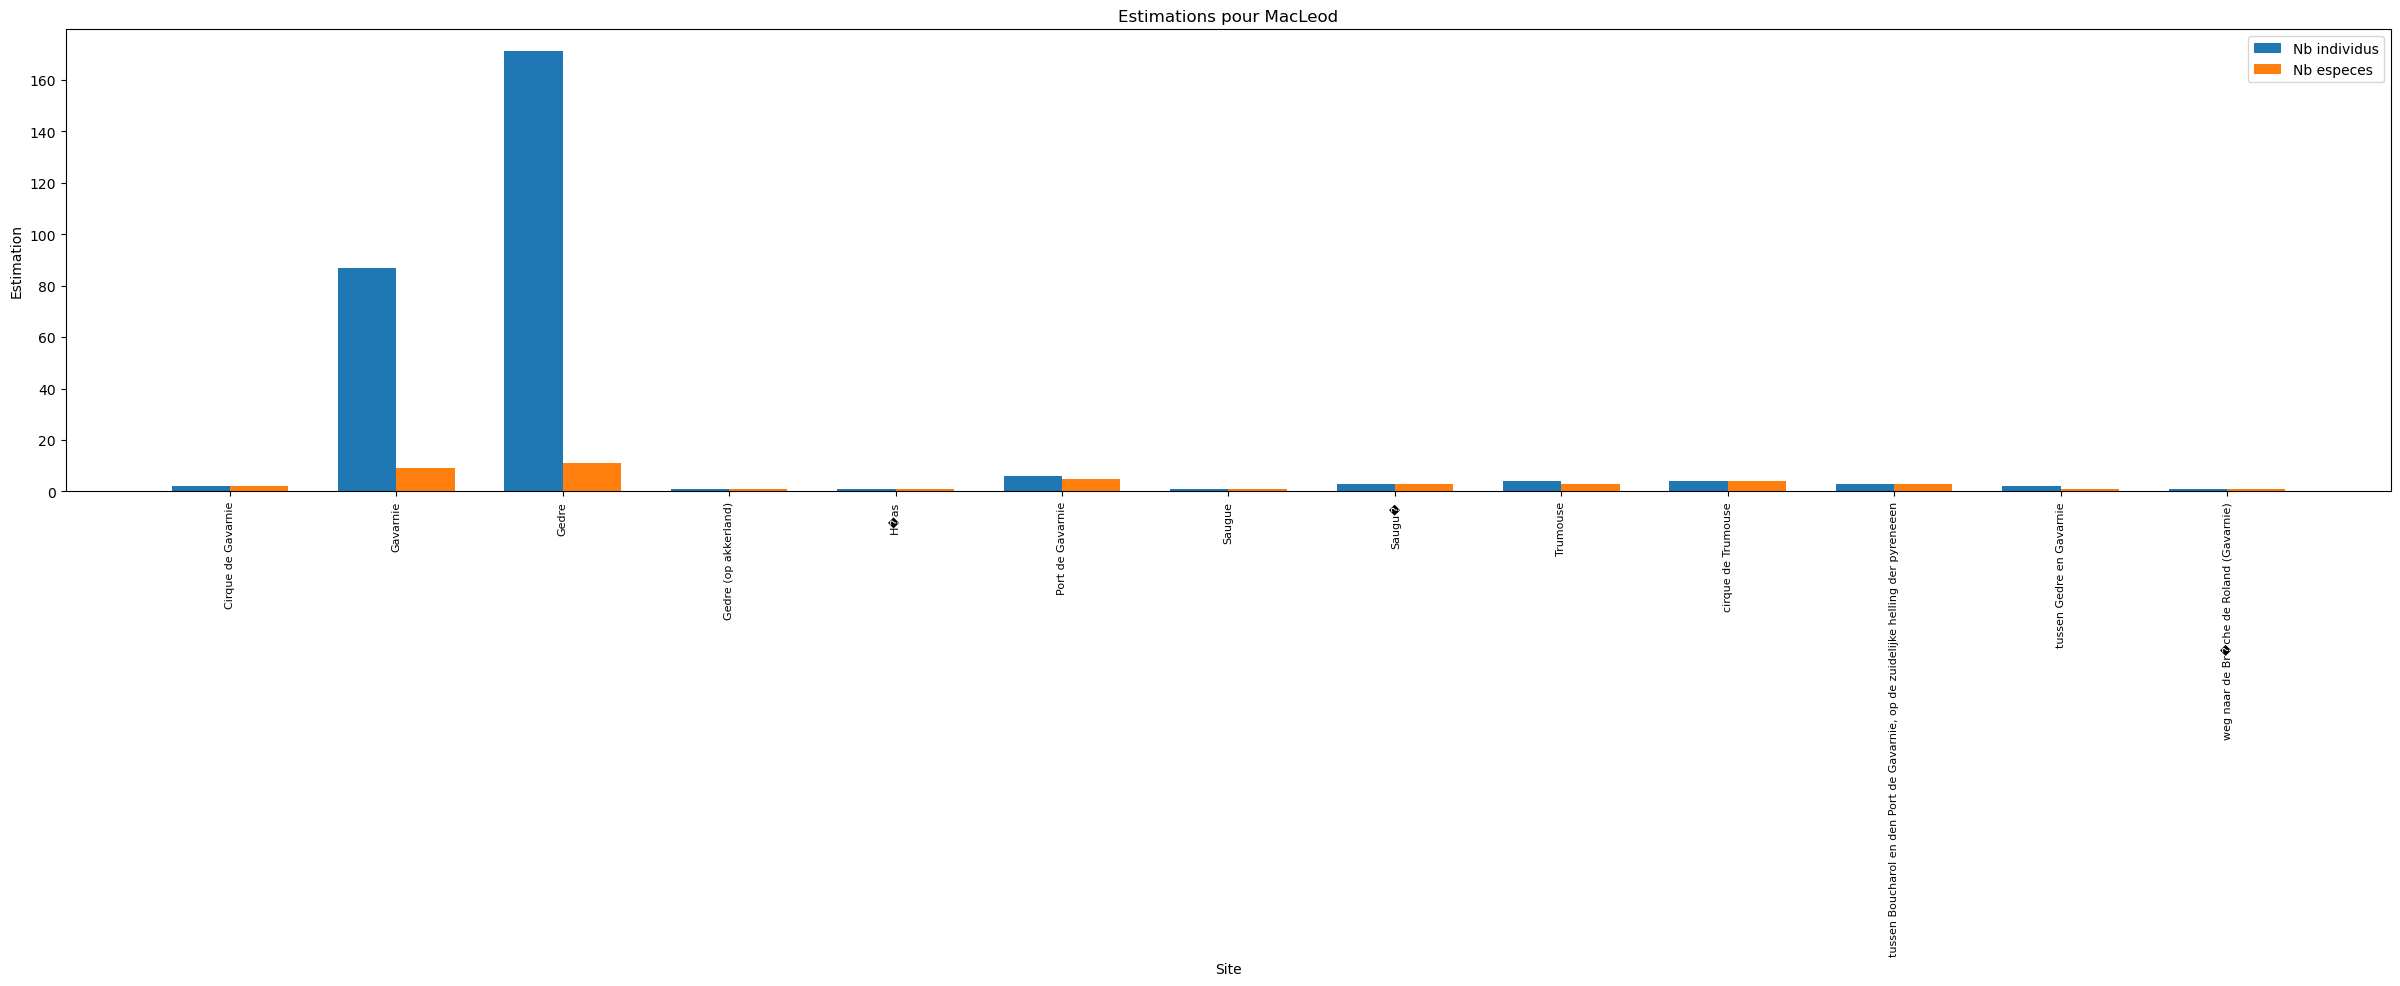

In [141]:
plot_estimations(df_estim, 'MacLeod')

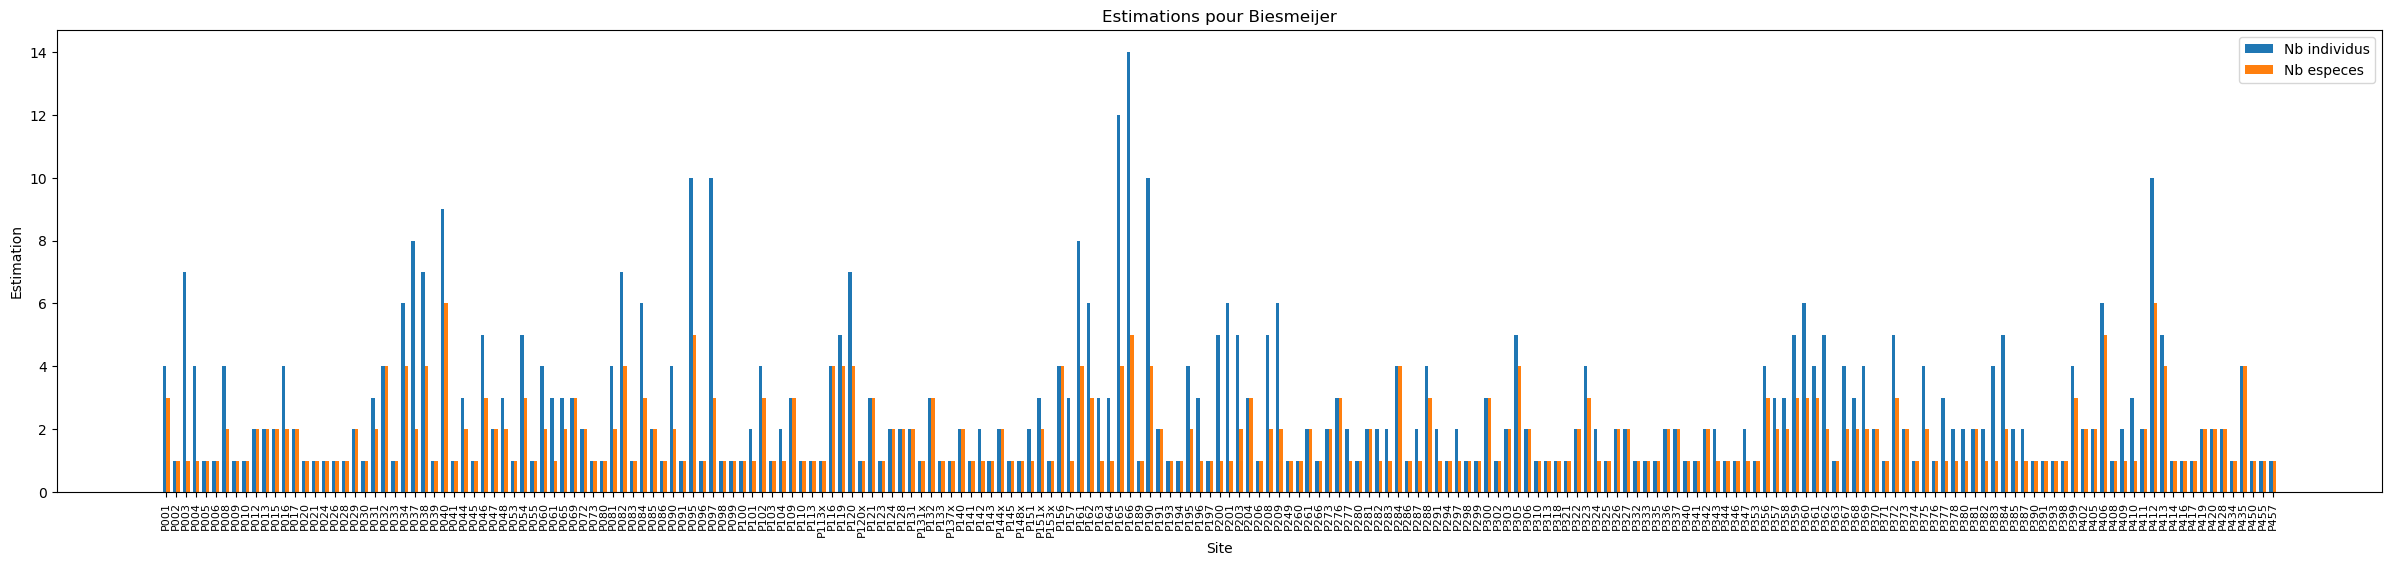

In [142]:
plot_estimations(df_estim, 'Biesmeijer')

<span style="color:silver">
J'ai fait long pour que ce soit un peu lisible (il y a 213 sites impossibles de mettre les noms plus lisibles en abscisses).

<span style="color:silver">
3)Courbe de raréfaction.

In [117]:
# Définition de la fonction pour calculer le nombre d'espèces observées pour un échantillon de taille n
def especes_par_echantillon(data, n):
    sample = random.sample(list(data['Visitor']), n)
    return len(set(sample))

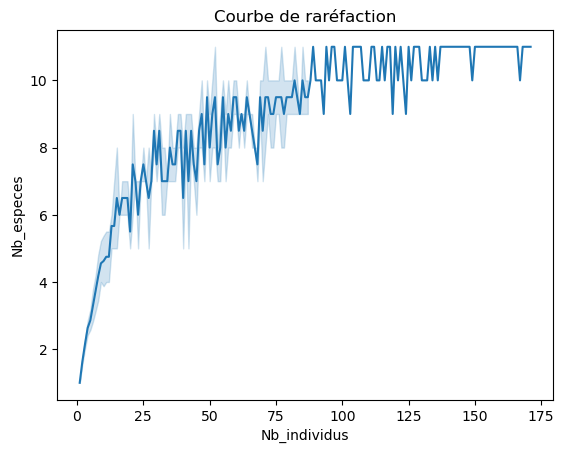

In [118]:
#On initialise la df avec laquelle on va faire la courbe.
rarefaction_courbe = pd.DataFrame(columns=['Site', 'Nb_individus', 'Nb_especes'])

#On itère sur chaque site (comme demandé)
for site in bumblebee['Site'].unique():
    site_data = bumblebee[bumblebee['Site'] == site]
    #On prend le nombre d'individus observés pour le site actuel.
    n_ind = len(site_data)
    #On initialise les résultats qui vontr eêtre ajouté à la df itération après itération.
    results = []
    #On sous-échantillonne et pour chaque sous échantillon on compte espece et ajt res à la df.
    for i in range(1, n_ind + 1):
        n_especes = especes_par_echantillon(site_data, i)
        results.append({'Site': site, 'Nb_individus': i, 'Nb_especes': n_especes})
    rarefaction_courbe = pd.concat([rarefaction_courbe, pd.DataFrame(results)])
#On affiche
sns.lineplot(x='Nb_individus', y='Nb_especes', data=rarefaction_courbe)
plt.title('Courbe de raréfaction')
plt.show()

<span style="color:green">
On remarque qu'il y a bien une saturation de l'échantillon, en raison de la pésence du plafond à la fin, on retrouve tout de même une bonne pente qui pourrait être symbole d'une abondance, c'est à dire une richesse des différentes espèces de bourdons. Cependant, on a pas énormément d'échantillons mais un plafond qui arrive tout de même rapidement. Un constat qui devrait nous alterter sur la condition de cet insecte. 

<span style="color:green">
En résumé, les bourdons se sont concentrés vers de plus hautes altitudes par rapport à 1889, la courbe de raréfaction nous montre qu'au bout d'une centaine
d'individus on stagne à une dizaine d'espèce, ce qu'on peut finalement juger de pas énorme.  
    
Mots clés : migration, peu d'espèces.

### Adaptation aux températures

Pour chaque espèce, représentez les températures à laquelles elles ont été échantillonnées en 1889 et en 2005-2006. Faites une figure et répondez aux questions suivantes : la température moyenne a-t-elle changé ? Les bourdons se sont-ils adaptés à l'augmentation de température dans les Pyrénées ? Si oui, comment ?


Lorsque vous avez plusieurs réplicats pour deux conditions d'échantillonnage il est possible de tester statistiquement si les valeurs sont différentes ou pas. Pour chaque espèce, vous pouvez faire ici un test non paramétrique [ANOVA](https://fr.wikipedia.org/wiki/Test_de_Kruskal-Wallis) pour tester si le climat auquel les bourdons pollinisent est plus chaud ou pas qu'en 1889.

In [81]:
# votre code ici
import statsmodels.api as sm
from statsmodels.formula.api import ols

<span style="color:silver">
A) Représentation des températures 1889-2005/2006 pour chaque espèces de bourdons.

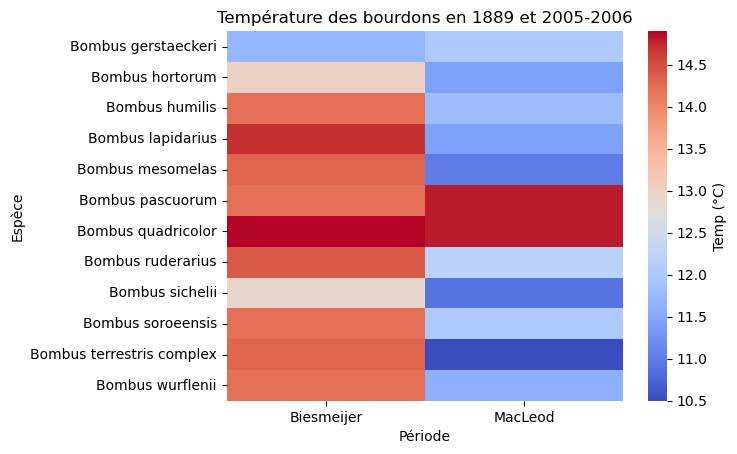

In [84]:
res = pd.DataFrame(columns=["Espece", "Data", "Temp"])

for (visitor, data), group in bumblebee.groupby(["Visitor", "Data"]) :
    tmp = group["clim"].values[0]
    
    res = pd.concat([res, pd.DataFrame({ "Espece" : [visitor], "Data" : [data],
                                           "Temp" : [tmp]
    })])
    
hm_tmp = res.pivot(index='Espece', columns='Data', values='Temp')
sns.heatmap(hm_tmp, cmap='coolwarm', cbar_kws={'label': 'Temp (°C)'})
plt.title('Température des bourdons en 1889 et 2005-2006')
plt.xlabel('Période')
plt.ylabel('Espèce')
plt.show()

<span style="color:green">
Par le biais de la heatmap, on remarque que les températures ont augmentés pour toutes les espèces observées. On peut conjecturer que l'adaptation s'est faite en allant vers des altitudes plus élevées donc logiqquement des températures plus faibles.

<span style="color:silver">
B)Anova.

<span style="color:silver">
Une version avec statsmodels (nepas prendre en compte).

In [83]:
#  for species in bumblebee['Visitor'].unique():
    
#     species_data = bumblebee[bumblebee['Visitor'] == species]
     
#     temps_1889 = species_data[species_data['Data'] == 'MacLeod']['clim']
#     temps_2005 = species_data[species_data['Data'] == 'Biesmeijer']['clim']
    
#     formula = 'clim ~ Data'
#     model = ols(formula, species_data).fit()
    
#     anova_results = sm.stats.anova_lm(model, typ=2)
#     print(species)
#     print(anova_results)
#     print()

<span style="color:silver">
La version avec scipy.stats, lib donnée sur le lien dans la question (tout en bad).

In [88]:
from scipy.stats import kruskal

results = {}

for species, group in bumblebee.groupby('Visitor'):
    
    df_1889 = group[group['Data'] == 'MacLeod']['clim']
    df_2005 = group[group['Data'] == 'Biesmeijer']['clim']
    
    _, pvalue = kruskal(df_1889, df_2005)
    
    results[species] = {'pvalue': pvalue}

results

{'Bombus gerstaeckeri': {'pvalue': 1.0},
 'Bombus hortorum': {'pvalue': 2.184636997447194e-06},
 'Bombus humilis': {'pvalue': 9.117085223514263e-05},
 'Bombus lapidarius': {'pvalue': 0.3337399657584868},
 'Bombus mesomelas': {'pvalue': 0.009324559850284193},
 'Bombus pascuorum': {'pvalue': 5.863153206610363e-06},
 'Bombus quadricolor': {'pvalue': 3.6460967819706165e-05},
 'Bombus ruderarius': {'pvalue': 0.12353126054721503},
 'Bombus sichelii': {'pvalue': 1.2248474763165296e-11},
 'Bombus soroeensis': {'pvalue': 0.0010459742229646481},
 'Bombus terrestris complex': {'pvalue': 0.007315025968373041},
 'Bombus wurflenii': {'pvalue': 0.11887433425452021}}

In [90]:
cpt = 0
for species, result in results.items():
    print(f"Espèce : {species}")
    print(f"p-value : {result['pvalue']}")
    if (result['pvalue'] < 0.05):
        print(f"Le climat est plus chaud qu'en 1889 pour le {species}.")
        print()
        cpt += 1
    else:
        print(f"Le climat n'est pas significativement différent pour le {species}")
        print()

Espèce : Bombus gerstaeckeri
p-value : 1.0
Le climat n'est pas significativement différent pour le Bombus gerstaeckeri

Espèce : Bombus hortorum
p-value : 2.184636997447194e-06
Le climat est plus chaud qu'en 1889 pour le Bombus hortorum.

Espèce : Bombus humilis
p-value : 9.117085223514263e-05
Le climat est plus chaud qu'en 1889 pour le Bombus humilis.

Espèce : Bombus lapidarius
p-value : 0.3337399657584868
Le climat n'est pas significativement différent pour le Bombus lapidarius

Espèce : Bombus mesomelas
p-value : 0.009324559850284193
Le climat est plus chaud qu'en 1889 pour le Bombus mesomelas.

Espèce : Bombus pascuorum
p-value : 5.863153206610363e-06
Le climat est plus chaud qu'en 1889 pour le Bombus pascuorum.

Espèce : Bombus quadricolor
p-value : 3.6460967819706165e-05
Le climat est plus chaud qu'en 1889 pour le Bombus quadricolor.

Espèce : Bombus ruderarius
p-value : 0.12353126054721503
Le climat n'est pas significativement différent pour le Bombus ruderarius

Espèce : Bombu

<span style="color:green">
LES ESPECES QUI SUBISSENT UN CLIMAT PLUS CHAUD QU'EN 1889 : 
    Bombus hortorum,    
    Bombus humilis,  
    Bombus mesomelas,  
    Bombus pascuorum,  
    Bombus quadricolor,  
    Bombus sichelii,  
    Bombus soroeensis,  
    Bombus terrestris complex.  
    
(Presque la totalité).
    

### Changements d'altitude

L'altitude moyenne a-t-elle variée en 115 ans ? On peut aussi s'intéresser aux plantes visitées. Ont-elles changé d'altitude ?

<span style="color:silver">
A)Moyenne MinEle et MaxEle pour chaque période d'observations.

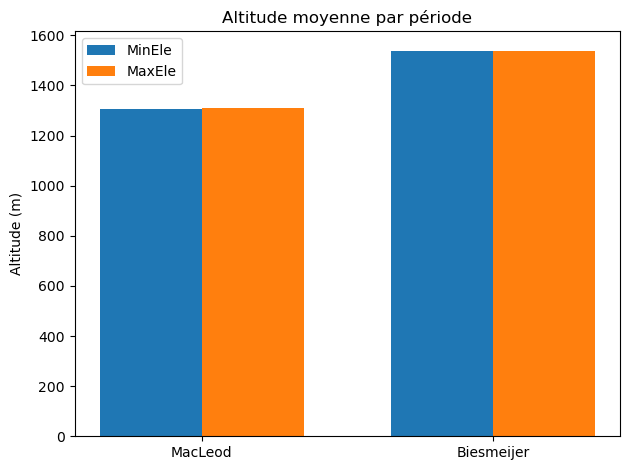

In [93]:
#On sépare
mac = bumblebee[bumblebee['Data'] == 'MacLeod']
bies = bumblebee[bumblebee['Data'] == 'Biesmeijer']

#On calcule les moyennes
mac_means = mac.groupby('Data')[['MinEle', 'MaxEle']].mean()
bies_means = bies.groupby('Data')[['MinEle', 'MaxEle']].mean()

#ON setup le graphique
labels = ['MacLeod', 'Biesmeijer']
min_means = [mac_means['MinEle'].values[0], bies_means['MinEle'].values[0]]
max_means = [mac_means['MaxEle'].values[0], bies_means['MaxEle'].values[0]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, min_means, width, label='MinEle')
rects2 = ax.bar(x + width/2, max_means, width, label='MaxEle')

ax.set_ylabel('Altitude (m)')
ax.set_title('Altitude moyenne par période')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

<span style="color:green">
La température moyenne a littéralement augmenté en 115 ans selon les observations, les barres le montre facilement.

In [94]:
#Petite vérif, car les barres étaeint étrangement les mêmes.
bumblebee.groupby("Data")['MaxEle'].sum() - bumblebee.groupby("Data")['MinEle'].sum()
#On remarque bien le 200 de diff quand x = MacLeod. RAS

Data
Biesmeijer      0
MacLeod       200
dtype: int64

<span style="color:silver">
B)Evolution de la température pour les visiteurs.

<span style="color:silver">
On va comparer l'altitude min moyen entre les visités observés de chaque période. 

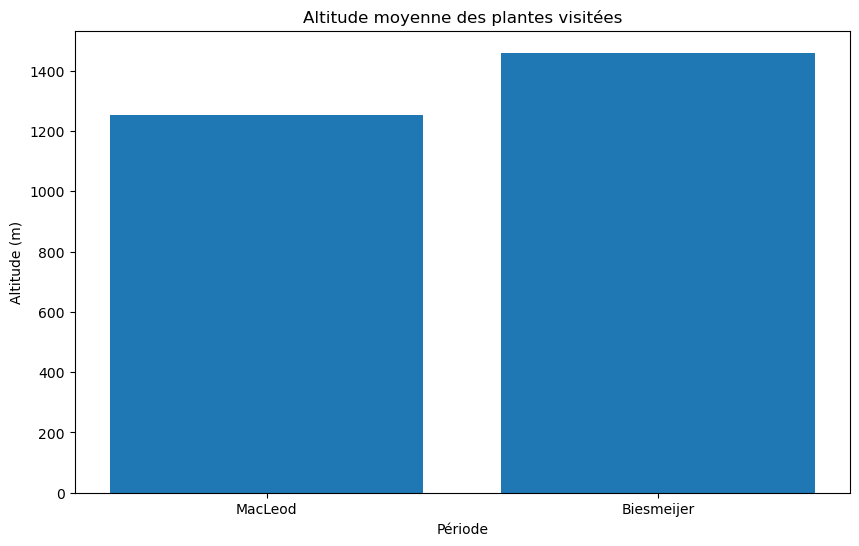

In [97]:
macleod_plant_altitude = mac.groupby('Plant')[['MinEle', 'MaxEle']].mean().mean(axis=1)
biesmeijer_plant_altitude = bies.groupby('Plant')[['MinEle', 'MaxEle']].mean().mean(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(['MacLeod', 'Biesmeijer'], [macleod_plant_altitude.mean(), biesmeijer_plant_altitude.mean()])

ax.set_xlabel('Période')
ax.set_ylabel('Altitude (m)')
ax.set_title('Altitude moyenne des plantes visitées')

plt.show()

<span style="color:silver">
On va comparer les epcèces visitées communes ce qui va être plus pertinent je pense.

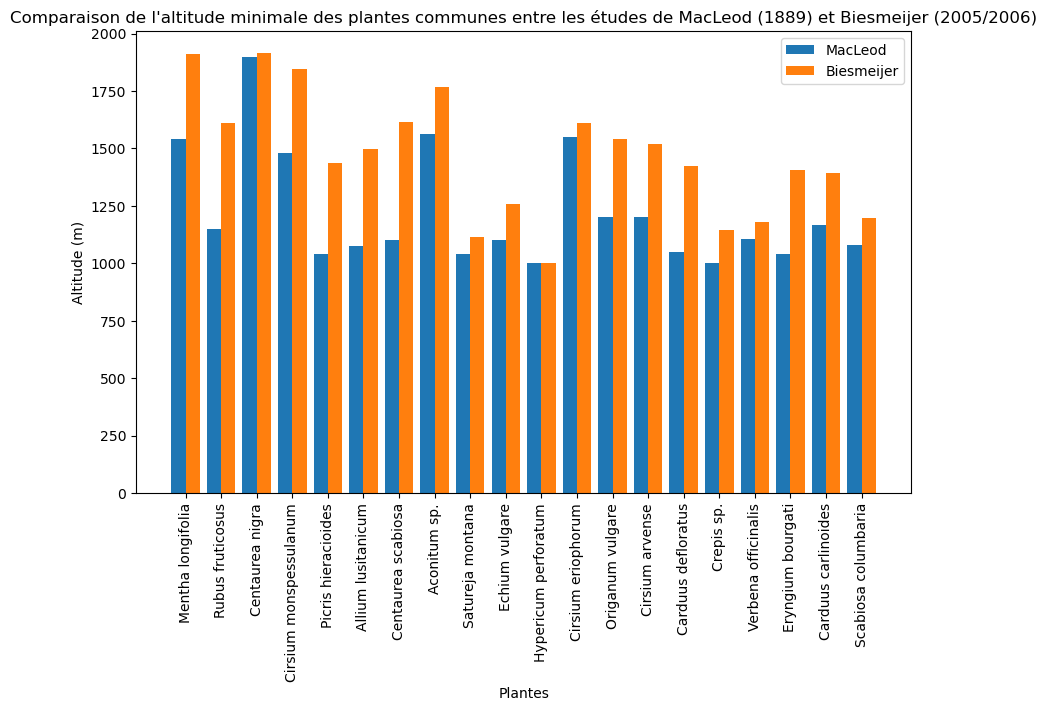

In [101]:
common_plants = set(mac['Plant']).intersection(set(bies['Plant']))

macleod_plant_min_elevation = mac[mac['Plant'].isin(common_plants)].groupby('Plant')['MinEle'].mean()
biesmeijer_plant_min_elevation = bies[bies['Plant'].isin(common_plants)].groupby('Plant')['MinEle'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
plants = list(common_plants)
x_pos = [i for i in range(len(plants))]
ax.bar(x_pos, macleod_plant_min_elevation, width=bar_width, label='MacLeod')
ax.bar([i+bar_width for i in x_pos], biesmeijer_plant_min_elevation, width=bar_width, label='Biesmeijer')

ax.set_xlabel('Plantes')
ax.set_ylabel('Altitude (m)')
ax.set_xticks([i+bar_width/2 for i in x_pos])
ax.set_xticklabels(plants)
ax.legend()
plt.xticks(rotation=90)
ax.set_title('Comparaison de l\'altitude minimale des plantes communes entre les études de MacLeod (1889) et Biesmeijer (2005/2006)')

plt.show()

<span style="color:green">
L'altitude des plantes visitées à augmenter en 115 ans, ca suit logiquement le chemin des bourdons et est une preuve suplémentaire du changement de la "tendance" d'altiude des bourdons.

### Figure 4 : pour aller plus loin 


Tracez les profils de fréquentation des trois plantes les plus visitées sur les deux périodes. 
Un profil de fréquentation montre la fréquence de visite le long de l'altitude pour chaque période. Cela permet de distinguer l'altitude moyenne à laquelle les bourdons pollinisent et l'altitude maximale, ces deux valeurs pouvant varier à des vitesses différentes au cours du temps.
On peut aussi regarder si ce sont les mêmes espèces qui pollinisent les plantes.

<span style="color:silver">
On cherche le top 3 des plantes les plus visitées pour chaque période.

In [107]:
mac_plants = bumblebee[bumblebee['Data'] == 'MacLeod']['Plant'].value_counts().head(3)
b_plants = bumblebee[bumblebee['Data'] == 'Biesmeijer']['Plant'].value_counts().head(3)
print(mac_plants,"\n")
print(b_plants)

Carduus defloratus    44
Aconitum sp.          25
Centaurea nigra       13
Name: Plant, dtype: int64 

Centaurea nigra       84
Cirsium vulgare       61
Centaurea scabiosa    58
Name: Plant, dtype: int64


<span style="color:silver">
On filtre la df pour chaque période.

In [109]:
#On garde les lignes avec les trois plantes les plus visitées pour chaque période d'étude.
df_mac_top = bumblebee[(bumblebee['Data'] == 'MacLeod') & (bumblebee['Plant'].isin(mac_plants.index))]
df_b_top = bumblebee[(bumblebee['Data'] == 'Biesmeijer') & (bumblebee['Plant'].isin(b_plants.index))]

In [110]:
df_mac_top.head()

,Longitude,Latitude,Visitor,Plant,Date,Site,Data,MinEle,MaxEle,EleZone,clim
1,-0.038612,42.74206,Bombus sichelii,Carduus defloratus,18/8/1889,Port de Gavarnie,MacLeod,1800,1800,1800-2000,10.9
5,-0.035850,42.74282,Bombus terrestris complex,Carduus defloratus,18/8/1889,Port de Gavarnie,MacLeod,1700,1700,1600-1800,11.4
7,-0.027410,42.71274,Bombus terrestris complex,Carduus defloratus,18/8/1889,"tussen Boucharol en den Port de Gavarnie, op d...",MacLeod,1800,1800,1800-2000,11.0
12,-0.016726,42.73138,Bombus sichelii,Carduus defloratus,13/8/1889,Gavarnie,MacLeod,1700,1700,1600-1800,11.6
14,-0.016726,42.73138,Bombus mesomelas,Carduus defloratus,17/8/1889,Gavarnie,MacLeod,1700,1700,1600-1800,11.6


In [113]:
df_b_top.head()

,Longitude,Latitude,Visitor,Plant,Date,Site,Data,MinEle,MaxEle,EleZone,clim
286,-0.079306,42.75619,Bombus wurflenii,Centaurea scabiosa,13/8/2005,P082,Biesmeijer,1500,1500,1400-1600,14.2
287,-0.079306,42.75619,Bombus pascuorum,Centaurea scabiosa,13/8/2005,P082,Biesmeijer,1500,1500,1400-1600,14.2
288,-0.079306,42.75619,Bombus pascuorum,Centaurea scabiosa,13/8/2005,P082,Biesmeijer,1500,1500,1400-1600,14.2
289,-0.079306,42.75619,Bombus pascuorum,Centaurea scabiosa,13/8/2005,P082,Biesmeijer,1500,1500,1400-1600,14.2
290,-0.079306,42.75619,Bombus soroeensis,Centaurea scabiosa,13/8/2005,P082,Biesmeijer,1500,1500,1400-1600,14.2


<span style="color:silver">
On affcihe les courbes de profil de fréquentation pour chaque période, on aura la répartiton sur les altitudes et les bourdons
qui les pollénisent le plus.

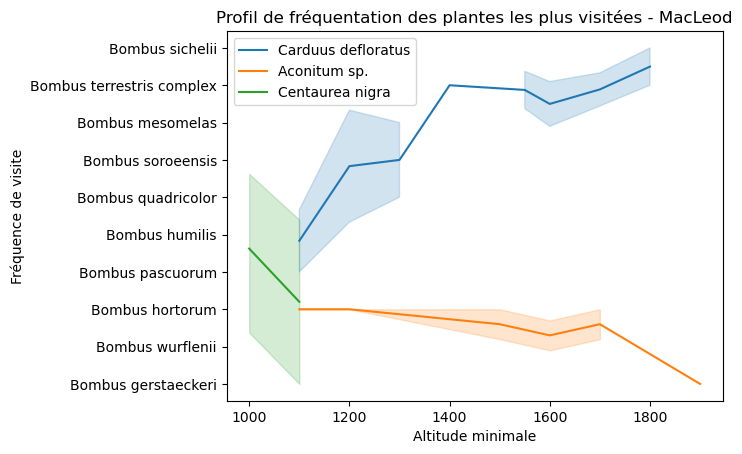

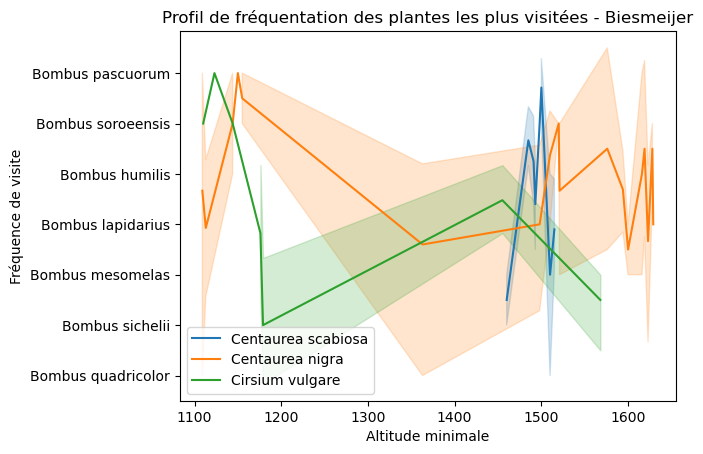

In [115]:
for data, df in [('MacLeod', df_mac_top), ('Biesmeijer', df_b_top)]:
    for plant in df['Plant'].unique():
        plant_df = df[df['Plant'] == plant]
        sns.lineplot(x='MinEle', y='Visitor', data=plant_df, label=f'{plant}')
    plt.legend()
    plt.xlabel('Altitude minimale')
    plt.ylabel('Fréquence de visite')
    plt.title(f'Profil de fréquentation des plantes les plus visitées - {data}')
    plt.show()

<span style="color:green">
On remarque des tendances verticales pour Biesmeijer vers les hautes altitudes, ceci indique qu'il y a beacoup d'espèces qui visitent ces trois plantes, c'est un peu plus horizontale vers les moyennes altitudes( donc constat inverse). Ceci montre que l'altitude moyen est assez elevé.  
    
Pour MacLeold c'est assez horizontal et une des espèce les plus visitées se trouve uniquement en basse altitude.  
On remarque vraiment une inversion de la tendance;

# Evaluation/Conclusions

Ce TP a permis d'appréhender les corrélations entre changement de température au cours du temps et modification de la biodiversité en prenant l'exemple des bourdons et de la pollinisation de plantes sauvages. 

Commentez vos résultats en faisant (i) un résumé de vos trouvailles (ii) en lien avec le cours (prenez un peu de recul). Peut-on faire des prédictions ? Quelles expériences pourriez vous proposer par la suite ?

<span style="color:green">
Dans ce TP nous avons eu l'occasion, dans un premier temps, de faire une analyse du climat dans les Pyrénées. Pour ce fait, nous avons analysé graphiquement l'évolution moyenne (des extremum aussi) et vu une certaine augmentation. Ces figures m'ont motivé à faire une régression linéaire afin de déterminer le changement moyen par décennie et prédire une température pou rune année ultérieur. Ainsi, les prévisions d'augmentations étaient avérées.  
La deuxième partie nous a permis de remarquer le dynamisme concernant l'utilisation des sols là où les humains sont présents.  
Ensuite, nous avons constater le changement d'altitudes des bourdons en 115 ansi qu'une certaine "pauvreté" de la biodiversité (pas beaucoup d'espèce de bourdons), peutre des "species of concern". On a vu que les plantes étaient logiquement concernées par le changement d'altitude,c'est dû à la pollénisation.  
On peut s'inquiéter pour ces plantes égalemetn dont le sort suivra celui des bourdons.

<span style="color:green">
On pourrait tenter de voir qui attire qui, en replacant cerrtaines plantes dans des altitudes peu présentes.